# 随机梯度下降法

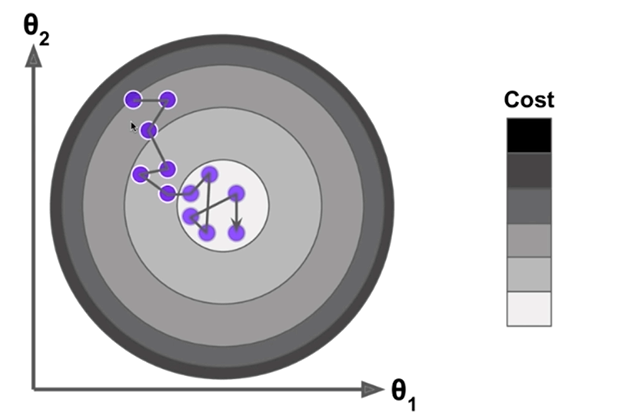

在随机梯度下降法中我们的$\eta$要逐渐下降

$$\eta=\frac{a}{i\_iters+b}$$

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
m = 100000
x = np.random.normal(size = m)
X = x.reshape(-1,1)
y = 4.*x+3.+np.random.normal(0,3,size = m)
y

array([ 1.17341037, -6.20743744,  9.233528  , ...,  6.3148967 ,
        1.27093374, -2.41338729])

$$\sum_{i=1}^{m}{(y-X_b\cdot{\theta})^2}$$

In [3]:
def J (theta , X_b, y):
    try:
        return np.sum((y-X_b.dot(theta))**2)/len(y)
    except:
        return float('inf')
    
def dJ(theta,X_b,y):
    return X_b.T.dot(X_b.dot(theta)-y)*2./len(y)

def gradient_descent(X_b, y, initial_theta, eta, n_iters=1e4, epsilon=1e-8):

            theta = initial_theta
            cur_iter = 0

            while cur_iter < n_iters:
                gradient = dJ(theta, X_b, y)
                last_theta = theta
                theta = theta - eta * gradient
                if (abs(J(theta, X_b, y) - J(last_theta, X_b, y)) < epsilon):
                    break

                cur_iter += 1

            return theta

In [4]:
%%time
X_b = np.hstack([np.ones((len(X),1)),X])
initial_theta=np.zeros(X_b.shape[1])

eta = 0.01
theta = gradient_descent(X_b,y,initial_theta,eta)

CPU times: user 572 ms, sys: 304 ms, total: 876 ms
Wall time: 887 ms


## 随机梯度下降法

In [6]:
def dJ_sgd(theta , X_b_i , y_i):
    return X_b_i.T.dot(X_b_i.dot(theta)-y_i)  * 2

def sgd(X_b,y,initial_theta, n_iters):
    t0 = 5
    t1 = 50
    
    def learning_rate(t):
        return t0/(t+t1)
    
    theta = initial_theta
    for cur_iters in range (n_iters):
        rand_i = np.random.randint(len(X_b))
        gradient = dJ_sgd(theta,X_b[rand_i],y[rand_i])
        theta = theta-learning_rate(cur_iters) * gradient
        
    return theta 

In [7]:
%%time
X_b = np.hstack([np.ones((len(X),1)),X])
initial_theta = np.zeros(X_b.shape[1])

theta = sgd(X_b,y,initial_theta,n_iters=len(X_b)//3)

CPU times: user 228 ms, sys: 0 ns, total: 228 ms
Wall time: 248 ms


In [8]:
initial_theta.shape

(2,)

In [9]:
X_b.shape

(100000, 2)

In [10]:
a = X_b.dot(initial_theta)
a.shape

(100000,)